 PRactica 6

In [1]:
import pandas as pd
import joinCSV as join
import numpy as np
import Utils

# Utilidad creada para juntar los CSV
#join.joinCSV('Data/SensoresSeparados', 'combined_file')
data, X, y = Utils.load_traces('Data/SensoresSeparados/combined_file.csv')

#print(X, y)

In [2]:
# Cada accion tomada en la posicion que se tomó
# Utils.heatmap(data)
# Utils.frecuencias(data)
# Utils.sensores(data)


# Conclusiones de las cosas representadas
1. No hemos usado frenos en ningun momento y el circuito es un circulo asique tiene sentido que el acelerador y una de las direcciones tenga una clara preferencia.
Hemos descartado la puntuacion de karty porque no hay verticalidad en el circuito no será un factor que afecta a la conducción.
2. Podemos ver que de las 7 acciones posibles no llegamos a usar ninguna que se corresponda a los frenos asique la red será mas facil de entrenar acorde a ello.
3. La última gráfica nos permite averiguar que no hay manera humana de saber si mantener todos los sensores o quitar alguno asique por el momento los dejaremos.

In [3]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Usamos el standard scaler para los datos
# Notese que solo lo hacemos sobre X, no tiene sentido añadir y
scaling = StandardScaler()
scaling.fit(X)
Scaled_data = scaling.transform(X)

# Hacemos Principal Component Analysis DESPUES de Standard Scaler
# Esto da mejores resultados en general
principal = PCA(n_components=3)
principal.fit(Scaled_data)
salidaPCA = principal.transform(Scaled_data)
# print(X.shape, Scaled_data.shape)

# Utils.sensores3D(salidaPCA, data)


# Tendremos que cambiar las etiquetas a one hot encoding
from sklearn.preprocessing import OneHotEncoder

#etiquetas = ['NONE', 'ACCELERATE', 'BRAKE', 'LEFT_ACCELERATE','RIGHT_ACCELERATE', 'LEFT_BRAKE', 'RIGHT_BRAKE']
# En la realidad habrá menos etiquetas, no hemos usado en este caso ningun freno asique nos devuelve valores de 000 a 100

oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False)    # Incia encoder
oneHotEncoder.fit(y.values.reshape(-1, 1))                  # "Entrena encoder"
encoded = oneHotEncoder.transform(y.values.reshape(-1, 1))  # Devuelve las etiquetas segun codificacion

#print(encoded)

# Division de los datos en entrenamiento y prueba
# 80% de las entradas irán a entrenamiento y 20% restante a comprobarlos más tarde
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Scaled_data, encoded, train_size = 0.8, random_state = 1234)
x_trainP, x_testP, y_trainP, y_testP = train_test_split(salidaPCA, encoded, train_size = 0.8, random_state = 1234)

#print (x_train, y_train, x_test, y_test)
#print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
# import MLP_complete

# # Scaled_data son los 8 valores Escalados
# # salidaPCA tiene tamaño 3
# # encoded son los valores con el one-hot encoding

# inputSize = Scaled_data.shape[1]
# hiddenLayers = [4,4,4]
# outputSize = encoded.shape[1]

# # Perceptrón multicapa diseñado por nosotros
# # Esta vez es multicapa de verdad ;)
# mlpP6 = MLP_complete.MLP(inputSize, hiddenLayers, outputSize, seed=42, epislom=0.1)

# # Entrenamos la red
# alpha = 0.1 # Learning rate
# lambda_ = 1
# numIter = 20
# J_history = mlpP6.backpropagation(Scaled_data, encoded, alpha, lambda_, numIter)

# predicciones = mlpP6.predict(x_test)
# #predicciones = mlpP6.predict(Scaled_data)
# y_test_reversed = oneHotEncoder.inverse_transform(y_test)
# predictions_reversed = oneHotEncoder.inverse_transform(predicciones)
# print(confusion_matrix(y_test_reversed, predictions_reversed))


mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=20, alpha =0.0001,
solver='adam', verbose =10, random_state=21, tol=0.000000001)

mlp.fit(Scaled_data, encoded)
mlpPCA = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=20, alpha =0.0001,
solver='adam', verbose =10, random_state=21, tol=0.000000001)

mlpPCA.fit(salidaPCA, encoded)
#mlp.fit(x_train, y_train)



Iteration 1, loss = 0.87901009
Iteration 2, loss = 0.69051603
Iteration 3, loss = 0.65026932
Iteration 4, loss = 0.62269455
Iteration 5, loss = 0.60096928
Iteration 6, loss = 0.58223550
Iteration 7, loss = 0.56651516
Iteration 8, loss = 0.55346588
Iteration 9, loss = 0.54059392
Iteration 10, loss = 0.53062850
Iteration 11, loss = 0.52215873
Iteration 12, loss = 0.51262098
Iteration 13, loss = 0.50381529
Iteration 14, loss = 0.49637694
Iteration 15, loss = 0.48951843
Iteration 16, loss = 0.48327489
Iteration 17, loss = 0.47715937
Iteration 18, loss = 0.47160478
Iteration 19, loss = 0.46620606
Iteration 20, loss = 0.45890305


C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.91240201
Iteration 2, loss = 0.78468703
Iteration 3, loss = 0.77068559
Iteration 4, loss = 0.75765733
Iteration 5, loss = 0.74476829
Iteration 6, loss = 0.73231014
Iteration 7, loss = 0.72090719
Iteration 8, loss = 0.70924062
Iteration 9, loss = 0.69965771
Iteration 10, loss = 0.69077265
Iteration 11, loss = 0.68325524
Iteration 12, loss = 0.67536585
Iteration 13, loss = 0.66823886
Iteration 14, loss = 0.66227877
Iteration 15, loss = 0.65650932
Iteration 16, loss = 0.65044375
Iteration 17, loss = 0.64520808
Iteration 18, loss = 0.64167468
Iteration 19, loss = 0.63651340
Iteration 20, loss = 0.63351425


C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[[6151  953  163  148]
 [ 907 5717    0    5]
 [ 146    8  226    0]
 [ 395   83    0  510]]


ValueError: X has 3 features, but MLPClassifier is expecting 8 features as input.

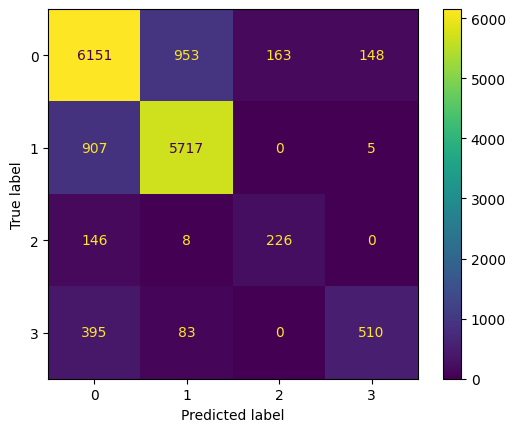

Precisión: 0.8178043083311706


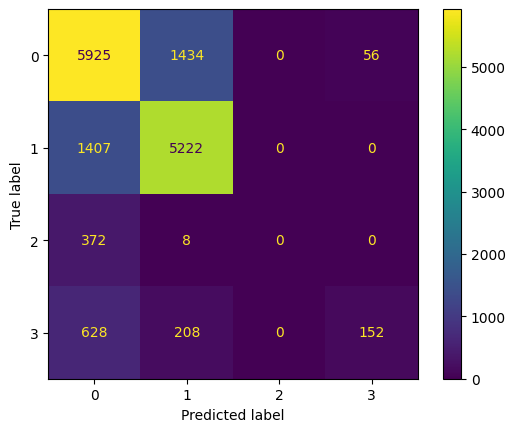

Precisión: 0.7331300285491824


In [8]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = mlp.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

predictions = mlpPCA.predict(x_testP)
y_test_reversed = oneHotEncoder.inverse_transform(y_testP)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

# COnclusiones de PCA
parece ser que para este numero de iteraciones (mi procesador es una patata eso ha tardado 15 minutos) o para este numero tan pequeño de entradas el PCA empeora los resultados asique seria mejor dejarlos tal cual están

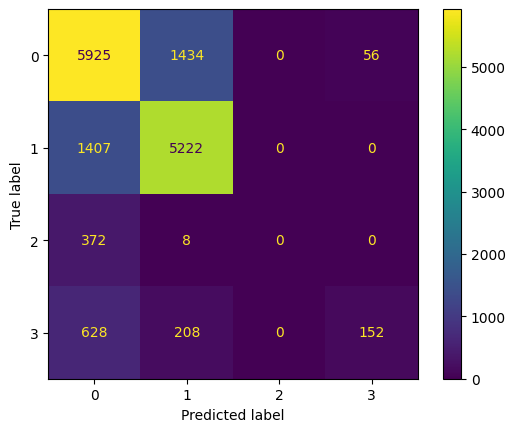

Precisión: 0.7331300285491824


In [6]:

accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

if accuracy>0.8:
    print("la prediccion parece decente asique me he toado la libertad de exportar la red ;)")
    import pickle

    # save
    with open('model.pkl','wb') as f:
        pickle.dump(mlp,f)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)

modelP = KNeighborsClassifier(n_neighbors = 1)
modelP.fit(x_trainP, y_trainP)


0.9998702309888399

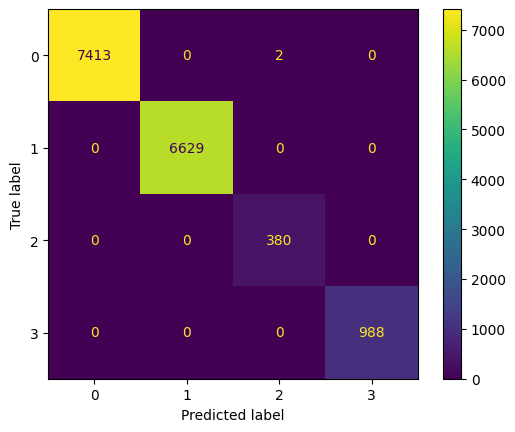

Precisión: 0.9998702309888399


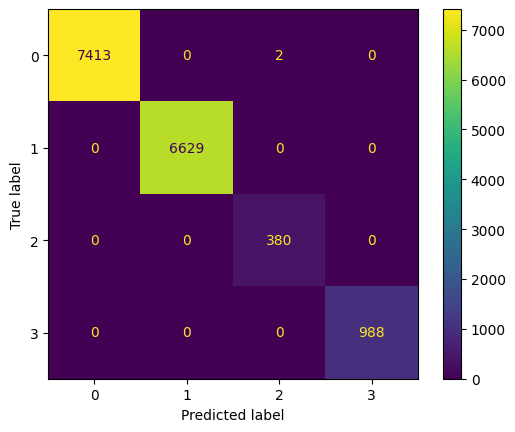

Precisión: 0.9998702309888399


In [13]:
predictions = model.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

predictions = modelP.predict(x_testP)
y_test_reversed = oneHotEncoder.inverse_transform(y_testP)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

# COnclusiones
KNN parece ser la opcion superior por un margen MUY amplio

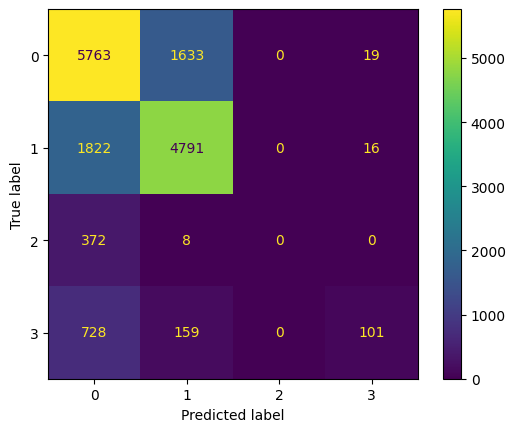

Precisión: 0.691344406955619


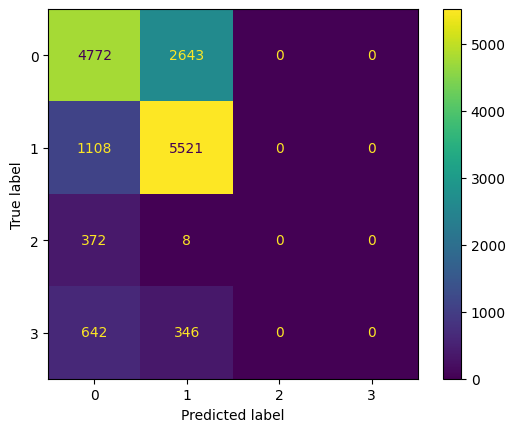

Precisión: 0.6678562159356346


In [19]:
from sklearn.tree import DecisionTreeClassifier, export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_treeP = DecisionTreeClassifier(random_state=0, max_depth=2)


decision_tree.fit(x_train, y_train)
decision_treeP.fit(x_trainP, y_trainP)
#r = export_text(decision_tree, features_names=)

decision_tree.score(x_test, y_test)
decision_treeP.score(x_testP, y_testP)

predictions = decision_tree.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")

predictions = decision_treeP.predict(x_testP)
y_test_reversed = oneHotEncoder.inverse_transform(y_testP)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")


# COnclusion
Decision tree parece dar resultados por debajo de los otros modelos con diferencia mostrando PCA con aun mas perdidas de aciertos

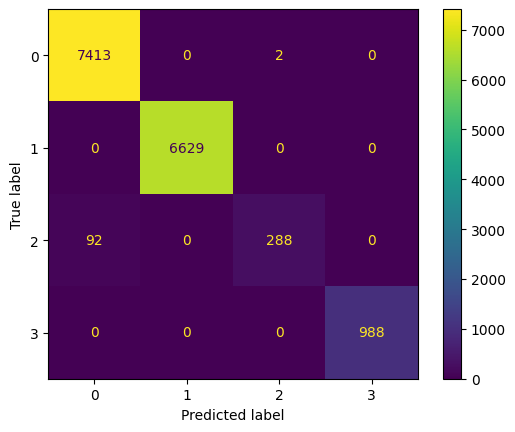

Precisión: 0.9939008564754737


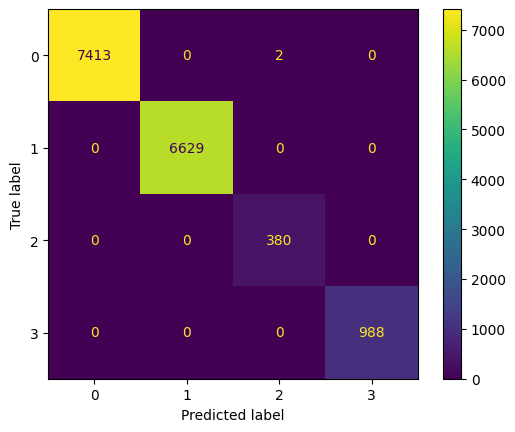

Precisión: 0.9998702309888399


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)


rfP = RandomForestClassifier(n_estimators=100, random_state=0)
rfP.fit(x_trainP, y_trainP)

# r = export_text(rf.estimators_[0], feature_names=feature_names)
# print(r)



predictions = rf.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")
score = rf.score(x_test, y_test)

predictions = rfP.predict(x_testP)
y_test_reversed = oneHotEncoder.inverse_transform(y_testP)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)
cm = confusion_matrix(y_test_reversed, predictions_reversed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test_reversed, predictions_reversed)
print(f"Precisión: {accuracy}")
score = rfP.score(x_testP, y_testP)

# Conclusion
Random Forest presenta una mejora notable respecto a los Decision Tree simples pero aun asi no  sería la mejor de las opciones. En este caso contamos con una pista de conduccion simple y pocas variables, pero por la propia naturaleza de los juegos de carreras en cuanto mas complejo se vuelva la situacion mas ganarán algoritmos como MLP o KNN